In [8]:
from sklearn.neural_network import MLPClassifier

from sklearn.experimental import enable_hist_gradient_boosting

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.svm import NuSVC

from sklearn import preprocessing
import matplotlib.pyplot as plt

import numpy as np
import joblib
from sklearn.metrics import plot_confusion_matrix

In [9]:
models = {'MLP':MLPClassifier(hidden_layer_sizes=(1024,1024),solver='lbfgs'),'RF':ExtraTreesClassifier(n_estimators=250),'SVM':NuSVC(nu=0.2),'Boosting':HistGradientBoostingClassifier()}

In [10]:
dataset = np.load('dataset.npy')
X,y = dataset[:,:-1],dataset[:,-1]
scaler = joblib.load('scaler')
X_scaled = scaler.transform(X)

In [11]:
actions = ['c_lane', 'p_o', 'slow', 'stop', 'straight', 't_l', 't_r', 'wt_t_l']

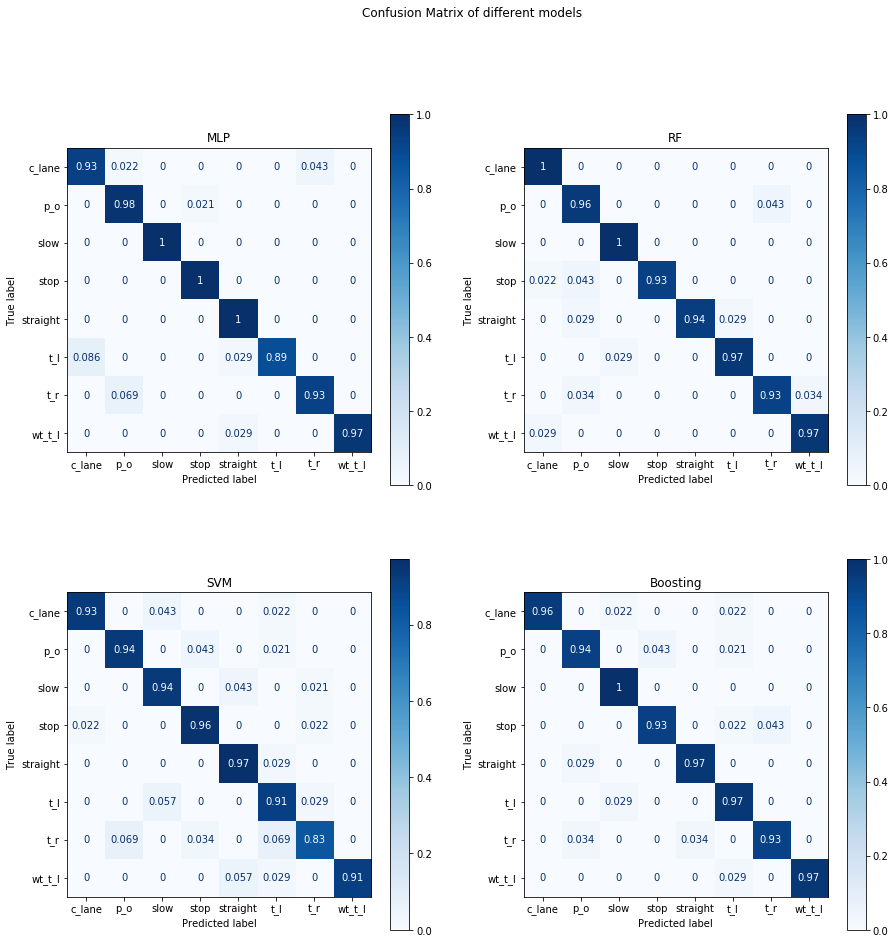

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle("Confusion Matrix of different models")
for ax, model in zip(axes.ravel(), models):
    clf = joblib.load(model)
    plot_confusion_matrix(clf, X_scaled, y,display_labels=actions,cmap=plt.cm.Blues,normalize="true",ax=ax)
    ax.set_title(model)